# Lab 08 - Missing Values - Andrew Badzioch

#### Notes:
- analyze data for presentation
- complete analysis for data mining
- prepare data for more complex things: Ml, DL, Comp Vision, NLP, LLM (GenAI)
    - cannot use data with missing values  
- Data Preprocessing

- What are missing values in a dataset?
1. the real-world data is rarelt clean or homogeneous.
2. most of the real datasets contain missing values.
3. missing values are the values that are either not collected or non-existent.
4. the general term for missing values is NA (not available)
5. NA can be null, None, or NaN:
    - null: any piece of data that is not defined
    - None: any Python object that is missing in a code
    - NaN: not a number, indicating the missing value is a numeric dtype according to NumPy library
6. the most known missing values are in the NaN format

In [1]:
# general libraries
import numpy as np
import pandas as pd
import os
import math

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# let's check out none
a = None

In [3]:
type(a)

NoneType

In [4]:
print(a)

None


In [5]:
# let's see if we can use None as a value
b = np.array([2, 'Andy', None, 5])
b

array([2, 'Andy', None, 5], dtype=object)

In [6]:
# let's check out Nan in both NumPy and pandas
c = np.array([6, 9, np.nan, 10])
c

array([ 6.,  9., nan, 10.])

In [7]:
d = pd.Series([3, None, 7, np.nan])
d

0    3.0
1    NaN
2    7.0
3    NaN
dtype: float64

### Importing Libraries

In [8]:
# general libraries
# import numpy as np
# import pandas as pd
# import os
# import math

# data visualization libraries
# import matplotlib.pyplot as plt
# import seaborn as sns

# suppressing warnings
# import warnings
# warnings.filterwarnings('ignore')

### Load the Dataset

In [9]:
df = pd.read_csv('titanic_dataset.csv')

In [10]:
# copy dataset
titanic = df.copy()

In [11]:
# checking the dataset load
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### EDA
- attributes

In [12]:
titanic.shape

(891, 12)

In [13]:
titanic.size

10692

In [14]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
titanic.ndim

2

In [17]:
# basic data exploration: attributes
# examine missing values
titanic.isnull().sum()
# 1. there is missing values in this dataset
# 2. age: 177 missing values (numerical), cabin: 687 (object), embarked:2 (multi-categorical, classes)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Seven V's of Data Science**
- volume
- variety
- velocity
- variability
- veracity
- value
- visualization

In [19]:
titanic.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### Strategies in Handling Missing Values
- there are 3 strategies in handling missing values:
1. using the dropna() method: there are 3 situationsin using dropna(): used for both numeric and non-numeric
    - df.dropna(): dropping any missing values (row and column levels)
    - df.dropna(axis=0): dropping any row aith missing values
    - df.dropna(axis=1): dropping any column with missing values
2. using fillna(): for numeric dtypes, filling missing values with the column mean or median
3. using fillna(): for non-numeric (categorical/object) dtypes, filling missing values with the 'most frequent' value or any value such as <code>"no-info"</code> (imputation)
- **BE CAREFUL WHEN DROPPING MISSING VALUES!** (look at ~50%)
- when you have outliers, it is safe to fill with median, not mean

In [20]:
# create variable for practice
titanic1 = titanic.copy()

In [21]:
titanic1.shape

(891, 12)

In [22]:
# let's see the percentage of missing values in every variable
titanic1.isnull().sum() * 100 / len(titanic1)
# 1. would dropping any of these columns be helpful?

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

**Since cabin variable has 77% missing values and it does not seem critical to my data processing objectives, we can drop the entire column.**

#### Deleting a Column with or without missing values

In [23]:
# delete Cabin variable (minimum of 2 parameters, !must have 'inplace' to make it effective!)
titanic1.drop('Cabin', axis=1, inplace=True)

In [24]:
titanic1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [25]:
titanic2 = titanic.copy()

In [26]:
titanic2.shape

(891, 12)

In [27]:
# using the dropna() method
titanic2.dropna(inplace=True)

In [28]:
titanic2.shape

(183, 12)

In [29]:
titanic3 = titanic.copy()

In [30]:
titanic3.dropna(axis=1, inplace=True)
titanic3.shape

(891, 9)

In [31]:
titanic3.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare'],
      dtype='object')

In [32]:
titanic4 = titanic.copy()
titanic4.shape

(891, 12)

In [33]:
titanic4.dropna(axis=0, inplace=True)
titanic4.shape

(183, 12)

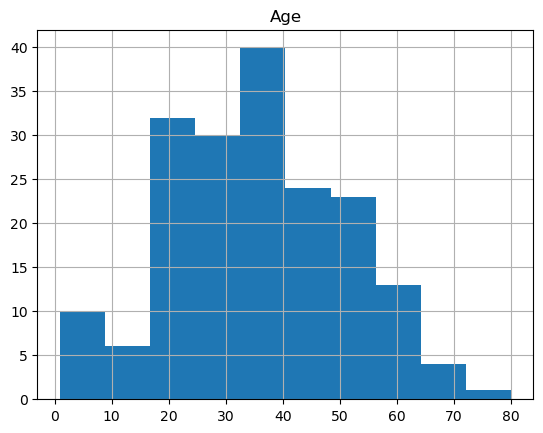

In [34]:
titanic4.hist('Age');

**When imputing the missing values of a numeric variable, it is a safer strategy to fill the missing values with the median() of the variable than the mean(), because the median is less sensitive to the outliers.**

In [35]:
# imputing the missing values of age using median()
titanic5 = titanic.copy()

In [36]:
# using titanic1 since it already has 'Cabin' column removed
titanic1['Age'] = titanic1['Age'].fillna(titanic1['Age'].median())

In [37]:
titanic1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [38]:
titanic1['Embarked'].value_counts() 

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

**Since the categorical variable of Embarked has 3 categories and the most frequent one is S, we impute the missing values of Embarked wit S category.**

In [39]:
titanic1['Embarked'].fillna('S', inplace=True)
titanic1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Conclusion:
- missing values can result from various causes (data entry errors, collection issues)
- knowing the reason can help decide whether to drop or fill missing values
- .drop(): will remove the row or column completely
- use .isnull().sum() or .info() for an overview of missing values
- use df.isnull().sum * 100 / len(df) to find percentage of missing values and proceed 
- .dropna() is the simplest form, removing any rows that contain at least one missing value
- .dropna(axis=0): default, drops rows with missing values
- .dropna(axis=1): drops columns with missing values
- .fillna(): fill missing values witha specified value or method
- .fillna(value=n): replaces NaN with a specific value n 
- .fillna(df.mean()): calculate the mean and replace NaN 
- .fillna(df.median()): calculate the median and replace NaN
- .fillna(method=ffill): forward fill, uses the last known value to fill NaN moving forward
- .fillna(method=bfill): backward fill, uses the nest know value to fill NaN miving backward
- (inplace=True): used to modify the DataFrame directly

**End of Lab 08**